# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [15]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import time
import citipy
import matplotlib.pyplot as plt
import holoviews as hv

# Import API key
from api_keys import geoapify_key

In [20]:
!pip install geoviews cartopy pyproj

   ---------------------------------------- 0.0/547.3 kB ? eta -:--:--
   --------------------------------------- 547.3/547.3 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.0 MB 16.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/11.0 MB 16.8 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 13.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.3 MB 5.0 MB/s eta 0:00:02
   -------------------------- ------------- 4.2/6.3 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ----------------

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
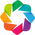

In [24]:
import holoviews as hv
hv.extension('bokeh')

In [25]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv(r'c:\Users\rache\python-api-challenge\cities.csv')

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [57]:
hotel_df["Hotel Name"] = hotel_df["Hotel Name"].fillna("No hotel found").astype(str)

In [69]:
%%capture --no-display

#Configure the map plot
map_plot = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo=True,
    size="Humidity",
    color="City",
    scale= 1,
    hover_cols=["City", "Country", "Humidity"],
    title="City Humidity (%)",
    tiles="OSM",
    alpha= 0.5,
    frame_width= 800,
    frame_height = 500
)
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Country)

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [80]:
# Narrow down cities that fit criteria and drop any results with null values
ideal_weather_df = city_data_df.loc[
    (city_data_df["Max Temp"] < 27)&
    (city_data_df["Max Temp"] > 21) \
   &(city_data_df["Wind Speed"] < 4.5) \
    &(city_data_df["Cloudiness"] == 0) 
]
# Drop any rows with null values
ideal_weather_df = ideal_weather_df.dropna()

# Display sample data
ideal_weather_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
45,45,kapaa,22.0752,-159.3190,22.99,84,0,3.60,US,1666108257
51,51,hilo,19.7297,-155.0900,26.27,83,0,2.57,US,1666108260
63,63,banda,25.4833,80.3333,24.62,52,0,2.68,IN,1666108268
81,81,makakilo city,21.3469,-158.0858,21.66,81,0,2.57,US,1666108282
152,152,kahului,20.8947,-156.4700,23.80,60,0,3.09,US,1666108246
197,197,gat,31.6100,34.7642,24.38,100,0,3.69,IL,1666108356
211,211,laguna,38.4210,-121.4238,21.67,79,0,2.06,US,1666108364
240,240,tikaitnagar,26.9500,81.5833,23.56,59,0,0.35,IN,1666108378
265,265,san quintin,30.4833,-115.9500,21.20,74,0,1.37,MX,1666108394
340,340,santa rosalia,27.3167,-112.2833,24.62,56,0,0.74,MX,1666108436


### Step 3: Create a new DataFrame called `hotel_df`.

In [81]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = ideal_weather_df[["City", "Country", "Lat", "Lng", "Humidity"]].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
45,kapaa,US,22.0752,-159.3190,84,
51,hilo,US,19.7297,-155.0900,83,
63,banda,IN,25.4833,80.3333,52,
81,makakilo city,US,21.3469,-158.0858,81,
152,kahului,US,20.8947,-156.4700,60,


In [82]:
hotel_df["Hotel Name"].value_counts()

Hotel Name
    17
Name: count, dtype: int64

### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [88]:
#Search hotel search 
print("Starting hotel search")

#Loop Through each cit
for index, row in hotel_df.iterrows():
    latitude = row["Lat"]
    longitude = row["Lng"]

# Set parameters to search for a hotel
radius = 10000
param = {
    "categories":"accommodation.hotel",
    "filter": f"circle:{longitude},{latitude},10000",  #10km radius
    "bias": f"proximity:{longitude},{latitude}",
    "limit":1,
    "apiKey": geoapify_key,

}

#Base Geoapify URL
base_url = "https://api.geoapify.com/v2/places"

#Make the request
response = requests.get(base_url, params=params)
#Convert the API response to JSON format
name_address = response.json()

# Grab the first hotel from the results and store the name in the hotel_df DataFrame
try:
    hotel_name = name_address["features"][0]["properties"]["name"]
    hotel_df.loc[index, "Hotel Name"] = hotel_name
except (KeyError, IndexError):
    # If no hotel is found, set the hotel name as "No hotel found".
    hotel_name = "No hotel found"
    hotel_df.loc[index, "Hotel Name"] = hotel_name

# Log the search results
print(f"{row['City']} - nearest hotel: {hotel_name}")
#Display sample data
hotel_df

Starting hotel search
guerrero negro - nearest hotel: No hotel found


,City,Country,Lat,Lng,Humidity,Hotel Name
45,kapaa,US,22.0752,-159.3190,84,
51,hilo,US,19.7297,-155.0900,83,
63,banda,IN,25.4833,80.3333,52,
81,makakilo city,US,21.3469,-158.0858,81,
152,kahului,US,20.8947,-156.4700,60,
197,gat,IL,31.6100,34.7642,100,
211,laguna,US,38.4210,-121.4238,79,
240,tikaitnagar,IN,26.9500,81.5833,59,
265,san quintin,MX,30.4833,-115.9500,74,
340,santa rosalia,MX,27.3167,-112.2833,56,


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)